# 3.3 Subset Selection

There are two reasons why we are often not satisfied with the least squares estimates.

* The first is prediction accuracy: the least squares estimates often have 
low bias but large variance (comparing with shrinking models not with k-nearest-neighbors). 
Prediction accuracy can sometimes be improved by shrinking or setting some 
coefficients to zero. By doing 
so we sacrifice a little bit of bias to reduce the variance of the 
predicted values, and hence may improve the overall prediction accuracy.

* The second reason is interpretation. With a large number of predictors, 
we often would like to determine a smaller subset that exhibit the 
strongest effects. In order to get the “big picture,” we are willing 
to sacrifice some of the small details.

## 3.3.1 Best-Subset Selection

Best subset regression finds for each $k \in \{0, 1, 2, . . . , p\}$ the subset 
of size k that gives smallest residual sum of squares (3.2). An efficient 
algorithm— _the leaps and bounds procedure_ (Furnival and Wilson, 1974)—makes 
this feasible for p as large as 30 or 40, meaning __not every dataset could 
have a best subset regression model__. 

__Remark__: find a combination of _variables (of features_ to estimate a model
that gives smallest residual sum of squares.  

### Dataset 

Prostate data info

* Predictors (columns 1--8)
    - lcavol
    - lweight
    - age
    - lbph
    - svi
    - lcp
    - gleason
    - pgg45

* outcome (column 9): lpsa

* train/test indicator (column 10): 
    - This last column indicates which 67 observations were used as the 
    "training set" and which 30 as the test set, as described on page 48
    in the book.

There was an error in these data in the first edition of this
book. Subject 32 had a value of 6.1 for lweight, which translates to a
449 gm prostate! The correct value is 44.9 gm. We are grateful to
Prof. Stephen W. Link for alerting us to this error.

The features must __first be scaled to have mean zero and variance 96 (=n)__
before the analyses in Tables 3.1 and beyond.  That is, if x is the  96 by 8 matrix
of features, we compute xp <- scale(x,TRUE,TRUE)


In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ch3 import LinearRegression
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats = ['svg']

In [39]:
lr = LinearRegression()
lr.data.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [42]:
lr.normalize_dataset()
lr.normalize_features.describe()


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
count,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01
mean,4.578239e-17,6.844468e-16,4.131861e-16,-2.432190e-17,-3.662591e-17,3.662591e-17,-2.174664e-17,5.636957e-17
std,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00
min,-2.300218e+00,-2.942386e+00,-3.087227e+00,-1.030029e+00,-5.256575e-01,-8.676552e-01,-1.047571e+00,-8.689573e-01
25%,-7.139973e-01,-5.937689e-01,-5.219612e-01,-1.030029e+00,-5.256575e-01,-8.676552e-01,-1.047571e+00,-8.689573e-01
50%,8.264956e-02,-1.392703e-02,1.531086e-01,1.383966e-01,-5.256575e-01,-4.450983e-01,3.444069e-01,-3.343557e-01
75%,6.626939e-01,5.806076e-01,5.581506e-01,1.010033e+00,-5.256575e-01,9.762744e-01,3.444069e-01,5.566470e-01
max,2.107397e+00,2.701661e+00,2.043304e+00,1.542252e+00,1.902379e+00,2.216735e+00,3.128363e+00,2.695054e+00


In [99]:
lr.split_dataset()

The shape of splitted dataset is: (67, 8)
The shape of splitted dataset is: (30, 8)
The shape of splitted dataset is: (67, 1)
The shape of splitted dataset is: (30, 1)


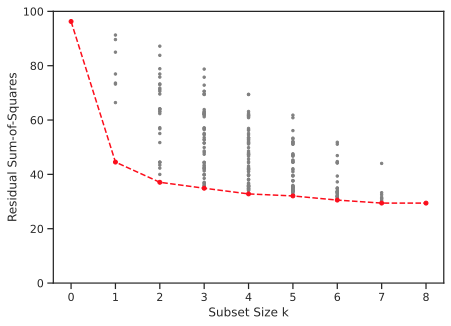

In [138]:
lr.fit_with_subsets()
lr.plot_figure_3_5()